## 1. Top genes visualization with pvalues

### 1.1 Barplot of the attention degree for genes

In [46]:
import pandas as pd
# Read node weight
AD_refilter_node_weight_df = pd.read_csv('./ROSMAP-analysis/avg_analysis/average_attention_AD_refilter_node_weight_df.csv')
AD_sort_refilter_node_weight_df = AD_refilter_node_weight_df.sort_values(by=['Att_deg'], ascending=False).reset_index(drop=True)
display(AD_sort_refilter_node_weight_df)

,Gene_num,Gene_name,Att_deg
0,68,AKT3,8.402738
1,1202,MAPK1,7.798475
2,560,EGFR,6.725241
3,67,AKT2,6.275843
4,65,AKT1,6.115870
...,...,...,...
96,1560,PPP2R5D,0.148139
97,1559,PPP2R5C,0.139134
98,1558,PPP2R5B,0.138631
99,551,EEF2,0.132360


In [65]:
# Read p values
import os
pval_df_list = []
for file_name in os.listdir('./ROSMAP-analysis/node_analysis_processed/pvalues'):
    if file_name.endswith('.csv'):
        pval_df = pd.read_csv('./ROSMAP-analysis/node_analysis_processed/pvalues/' + file_name)
        # fetch the file name after the second '-'
        pval_df.columns = ['gene_name', file_name.split('-', 2)[2].split('.')[0]]
        pval_df_list.append(pval_df)
# Concate files in horizontal
all_pval_df = pd.concat(pval_df_list, axis=1)
# Drop duplicated gene_name columns
all_pval_df = all_pval_df.loc[:,~all_pval_df.columns.duplicated()]
display(all_pval_df)

,gene_name,cnv_del_pvalues,cnv_dup_pvalues,cnv_mcnv_pvalues,gene-expression_pvalues,methy-Core-Promoter_pvalues,methy-Distal-Promoter_pvalues,methy-Downstream_pvalues,methy-Proximal-Promoter_pvalues,methy-Upstream_pvalues,proteomics_pvalues
0,ABL1,1.000000,1.0,0.175639,0.107218,0.813513,0.001904,0.751311,0.979089,0.341740,1.0
1,ABL2,1.000000,1.0,0.012679,0.735079,1.000000,0.166236,0.278289,0.850688,1.000000,1.0
2,ACAA1,1.000000,1.0,1.000000,0.922175,0.202383,1.000000,0.540288,0.083222,1.000000,1.0
3,ACACA,0.288826,1.0,1.000000,1.000000,1.000000,0.832054,0.204075,0.956294,1.000000,1.0
4,ACACB,1.000000,1.0,1.000000,0.678429,1.000000,0.506179,0.389686,0.787733,0.267863,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2094,ZFYVE16,1.000000,1.0,1.000000,0.037288,1.000000,0.115251,0.212691,0.795076,0.313493,1.0
2095,ZFYVE9,1.000000,1.0,1.000000,0.244905,1.000000,0.452906,0.336922,0.880673,0.189211,1.0
2096,ZMAT3,1.000000,1.0,0.324931,0.618479,1.000000,0.400278,0.232565,0.718996,1.000000,1.0
2097,ZNF274,1.000000,1.0,1.000000,0.073907,1.000000,0.582028,0.773104,1.000000,1.000000,1.0


In [74]:
pval_ordered_col_list = ['proteomics_pvalues', 'gene-expression_pvalues', 'cnv_del_pvalues', 'cnv_dup_pvalues', 'cnv_mcnv_pvalues', 
                         'methy-Downstream_pvalues', 'methy-Core-Promoter_pvalues', 'methy-Proximal-Promoter_pvalues', 'methy-Distal-Promoter_pvalues', 'methy-Upstream_pvalues']
# reversed order
pval_reversed_ordered_col_list = pval_ordered_col_list[::-1]
df_pval_reversed_ordered_col_list = ['gene_name'] + pval_reversed_ordered_col_list
all_ordered_pval_df = all_pval_df[df_pval_reversed_ordered_col_list]

# replace all '-' with '_' in column names
all_ordered_pval_df.columns = all_ordered_pval_df.columns.str.replace('-', '_')
# replaced with lower case
all_ordered_pval_df.columns = all_ordered_pval_df.columns.str.lower()
# replace 'proteomics' with 'protein_expression'
all_ordered_pval_df.columns = all_ordered_pval_df.columns.str.replace('proteomics', 'protein_expression')
display(all_ordered_pval_df)

# merge with all att_deg dataframes
AD_all_gene_Att_deg_df = pd.read_csv('./ROSMAP-analysis/avg_analysis/map-all-gene-AD-Att_deg.csv')
AD_all_gene_Att_deg_pvalue_df = pd.merge(AD_all_gene_Att_deg_df, all_ordered_pval_df, left_on='Gene_name', right_on='gene_name', how='left')
AD_all_gene_Att_deg_pvalue_df = AD_all_gene_Att_deg_pvalue_df.drop(columns=['gene_name'])
display(AD_all_gene_Att_deg_pvalue_df)
AD_all_gene_Att_deg_pvalue_df.to_csv('./ROSMAP-analysis/avg_analysis/map-all-gene-AD-Att_deg_pvalue.csv', index=False)

noAD_all_gene_Att_deg_df = pd.read_csv('./ROSMAP-analysis/avg_analysis/map-all-gene-NOAD-Att_deg.csv')
noAD_all_gene_Att_deg_pvalue_df = pd.merge(noAD_all_gene_Att_deg_df, all_ordered_pval_df, left_on='Gene_name', right_on='gene_name', how='left')
noAD_all_gene_Att_deg_pvalue_df = noAD_all_gene_Att_deg_pvalue_df.drop(columns=['gene_name'])
display(noAD_all_gene_Att_deg_pvalue_df)
noAD_all_gene_Att_deg_pvalue_df.to_csv('./ROSMAP-analysis/avg_analysis/map-all-gene-NOAD-Att_deg_pvalue.csv', index=False)


,gene_name,methy_upstream_pvalues,methy_distal_promoter_pvalues,methy_proximal_promoter_pvalues,methy_core_promoter_pvalues,methy_downstream_pvalues,cnv_mcnv_pvalues,cnv_dup_pvalues,cnv_del_pvalues,gene_expression_pvalues,protein_expression_pvalues
0,ABL1,0.341740,0.001904,0.979089,0.813513,0.751311,0.175639,1.0,1.000000,0.107218,1.0
1,ABL2,1.000000,0.166236,0.850688,1.000000,0.278289,0.012679,1.0,1.000000,0.735079,1.0
2,ACAA1,1.000000,1.000000,0.083222,0.202383,0.540288,1.000000,1.0,1.000000,0.922175,1.0
3,ACACA,1.000000,0.832054,0.956294,1.000000,0.204075,1.000000,1.0,0.288826,1.000000,1.0
4,ACACB,0.267863,0.506179,0.787733,1.000000,0.389686,1.000000,1.0,1.000000,0.678429,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2094,ZFYVE16,0.313493,0.115251,0.795076,1.000000,0.212691,1.000000,1.0,1.000000,0.037288,1.0
2095,ZFYVE9,0.189211,0.452906,0.880673,1.000000,0.336922,1.000000,1.0,1.000000,0.244905,1.0
2096,ZMAT3,1.000000,0.400278,0.718996,1.000000,0.232565,0.324931,1.0,1.000000,0.618479,1.0
2097,ZNF274,1.000000,0.582028,1.000000,1.000000,0.773104,1.000000,1.0,1.000000,0.073907,1.0


,Gene_num,Gene_name,Att_deg,methy_upstream_pvalues,methy_distal_promoter_pvalues,methy_proximal_promoter_pvalues,methy_core_promoter_pvalues,methy_downstream_pvalues,cnv_mcnv_pvalues,cnv_dup_pvalues,cnv_del_pvalues,gene_expression_pvalues,protein_expression_pvalues
0,0,ABL1,0.130678,0.341740,0.001904,0.979089,0.813513,0.751311,0.175639,1.0,1.000000,0.107218,1.0
1,1,ABL2,0.083612,1.000000,0.166236,0.850688,1.000000,0.278289,0.012679,1.0,1.000000,0.735079,1.0
2,2,ACAA1,0.040062,1.000000,1.000000,0.083222,0.202383,0.540288,1.000000,1.0,1.000000,0.922175,1.0
3,3,ACACA,0.893336,1.000000,0.832054,0.956294,1.000000,0.204075,1.000000,1.0,0.288826,1.000000,1.0
4,4,ACACB,0.794911,0.267863,0.506179,0.787733,1.000000,0.389686,1.000000,1.0,1.000000,0.678429,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,2094,ZFYVE16,0.032185,0.313493,0.115251,0.795076,1.000000,0.212691,1.000000,1.0,1.000000,0.037288,1.0
2095,2095,ZFYVE9,0.030367,0.189211,0.452906,0.880673,1.000000,0.336922,1.000000,1.0,1.000000,0.244905,1.0
2096,2096,ZMAT3,0.014582,1.000000,0.400278,0.718996,1.000000,0.232565,0.324931,1.0,1.000000,0.618479,1.0
2097,2097,ZNF274,0.048703,1.000000,0.582028,1.000000,1.000000,0.773104,1.000000,1.0,1.000000,0.073907,1.0


,Gene_num,Gene_name,Att_deg,methy_upstream_pvalues,methy_distal_promoter_pvalues,methy_proximal_promoter_pvalues,methy_core_promoter_pvalues,methy_downstream_pvalues,cnv_mcnv_pvalues,cnv_dup_pvalues,cnv_del_pvalues,gene_expression_pvalues,protein_expression_pvalues
0,0,ABL1,0.127302,0.341740,0.001904,0.979089,0.813513,0.751311,0.175639,1.0,1.000000,0.107218,1.0
1,1,ABL2,0.083176,1.000000,0.166236,0.850688,1.000000,0.278289,0.012679,1.0,1.000000,0.735079,1.0
2,2,ACAA1,0.038848,1.000000,1.000000,0.083222,0.202383,0.540288,1.000000,1.0,1.000000,0.922175,1.0
3,3,ACACA,0.885388,1.000000,0.832054,0.956294,1.000000,0.204075,1.000000,1.0,0.288826,1.000000,1.0
4,4,ACACB,0.784883,0.267863,0.506179,0.787733,1.000000,0.389686,1.000000,1.0,1.000000,0.678429,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,2094,ZFYVE16,0.032866,0.313493,0.115251,0.795076,1.000000,0.212691,1.000000,1.0,1.000000,0.037288,1.0
2095,2095,ZFYVE9,0.030978,0.189211,0.452906,0.880673,1.000000,0.336922,1.000000,1.0,1.000000,0.244905,1.0
2096,2096,ZMAT3,0.014557,1.000000,0.400278,0.718996,1.000000,0.232565,0.324931,1.0,1.000000,0.618479,1.0
2097,2097,ZNF274,0.048028,1.000000,0.582028,1.000000,1.000000,0.773104,1.000000,1.0,1.000000,0.073907,1.0


In [76]:
# Merge
AD_sort_refilter_node_weight_pval_df = AD_sort_refilter_node_weight_df.merge(all_ordered_pval_df, left_on='Gene_name', right_on='gene_name', how='left')
AD_sort_refilter_node_weight_pval_df = AD_sort_refilter_node_weight_pval_df.drop(columns=['gene_name'])
display(AD_sort_refilter_node_weight_pval_df)
pval_col_list = list(AD_sort_refilter_node_weight_pval_df.columns)[3:]
print(pval_col_list)

,Gene_num,Gene_name,Att_deg,methy_upstream_pvalues,methy_distal_promoter_pvalues,methy_proximal_promoter_pvalues,methy_core_promoter_pvalues,methy_downstream_pvalues,cnv_mcnv_pvalues,cnv_dup_pvalues,cnv_del_pvalues,gene_expression_pvalues,protein_expression_pvalues
0,68,AKT3,8.402738,0.221567,0.007778,1.000000,1.000000,0.055699,0.399471,1.0,0.408491,0.041859,1.0
1,1202,MAPK1,7.798475,1.000000,0.861910,0.470303,1.000000,0.234434,1.000000,1.0,0.253030,0.016100,1.0
2,560,EGFR,6.725241,0.003907,0.598474,1.000000,1.000000,0.929747,0.566741,1.0,1.000000,0.635365,1.0
3,67,AKT2,6.275843,0.369019,0.269926,0.405638,0.055092,0.079886,1.000000,1.0,1.000000,0.516907,1.0
4,65,AKT1,6.115870,0.820917,0.873159,0.018209,1.000000,0.929747,1.000000,1.0,1.000000,0.535569,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1560,PPP2R5D,0.148139,1.000000,0.433077,0.754930,0.676687,0.747698,1.000000,1.0,1.000000,0.225191,1.0
97,1559,PPP2R5C,0.139134,0.608441,0.854425,0.077455,0.681923,0.780409,1.000000,1.0,1.000000,0.000068,1.0
98,1558,PPP2R5B,0.138631,1.000000,0.649028,0.628594,1.000000,0.497078,1.000000,1.0,1.000000,0.219770,1.0
99,551,EEF2,0.132360,1.000000,0.751311,0.578765,0.773104,0.711880,1.000000,1.0,1.000000,0.032958,1.0


['methy_upstream_pvalues', 'methy_distal_promoter_pvalues', 'methy_proximal_promoter_pvalues', 'methy_core_promoter_pvalues', 'methy_downstream_pvalues', 'cnv_mcnv_pvalues', 'cnv_dup_pvalues', 'cnv_del_pvalues', 'gene_expression_pvalues', 'protein_expression_pvalues']


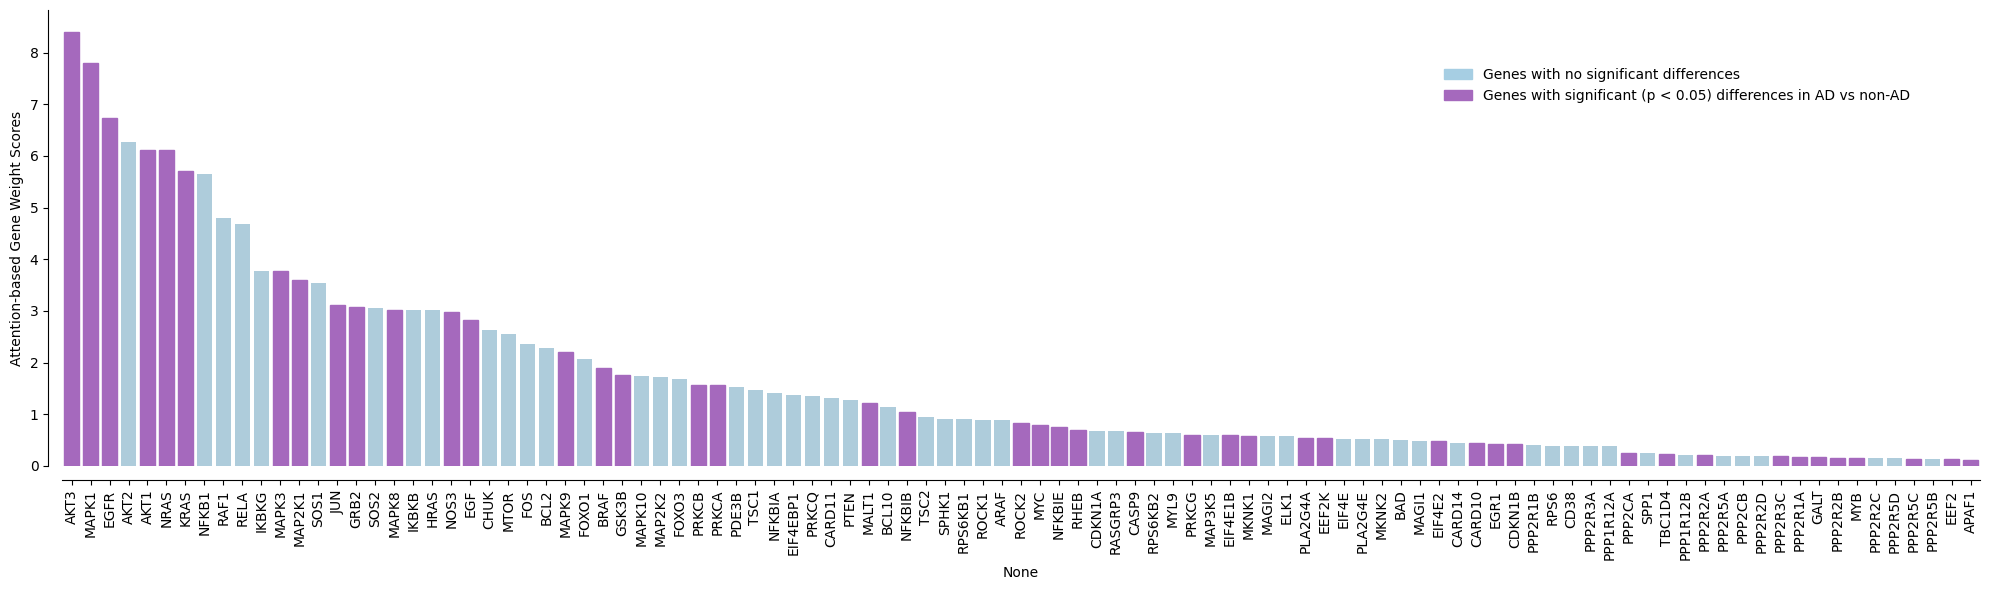

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

plt.figure(figsize=(20, 6))
# Create a horizontal bar plot for column A
barplot = sns.barplot(y=AD_sort_refilter_node_weight_pval_df['Att_deg'], x=AD_sort_refilter_node_weight_pval_df.index, color='#A6CEE3')  # uniform color for all bars

# Loop through the bars and highlight the ones where column B value is lower than 0.1
for idx, bar in enumerate(barplot.patches):
    # if AD_sort_refilter_node_weight_pval_df['gene-expression_pvalues'][idx] < 0.1:
    #     bar.set_color('#CAB2D6')  # This will set the color of the bar to red if the condition is met
    for pval_col in pval_col_list:
        if AD_sort_refilter_node_weight_pval_df[pval_col][idx] < 0.05:
            # bar.set_color('#CAB2D6')  # This will set the color of the bar to red if the condition is met
            bar.set_color('#a569bd')  # This will set the color of the bar to red if the condition is met



# Change y-axis label
plt.ylabel('Attention-based Gene Weight Scores')
# Adjust the y-axis spine to bring the zero a little higher
barplot.spines['left'].set_position(('outward', 10))  # Adjust 10 pixels outward to move it up
barplot.spines['left'].set_color('black')  # Change the color

# Also adjust the x-axis spine to bring the zero a little to the left
barplot.spines['bottom'].set_position(('outward', 10))  # Adjust 10 pixels outward to move it to the left

# Assuming 'OtherColumn' is the name of the other column whose values you want to use as x-labels
plt.xticks(ticks=range(len(AD_sort_refilter_node_weight_pval_df)), labels=AD_sort_refilter_node_weight_pval_df['Gene_name'].tolist(), rotation=90)
sns.despine(left=False, bottom=False, top=True, right=True)

# Create legend patches
legend_patches = [mpatches.Patch(color='#A6CEE3', label='Genes with no significant differences'),
                  mpatches.Patch(color='#a569bd', label='Genes with significant (p < 0.05) differences in AD vs non-AD')]

# Add legend to the barplot with a specific location, upper right but not too upper, and remove the border
barplot.legend(handles=legend_patches, 
               loc='upper right', 
               bbox_to_anchor=(0.97, 0.9),  # Adjust the position to control the vertical placement
               frameon=False)  # Remove the border around the legend

# Show the plot
# plt.show()

# Apply tight layout before saving
plt.tight_layout()

# Save the plot with high DPI and ensure the full image is saved
plt.savefig('./avg_AD_refilter_node_weight_pval_barplot.png', dpi=600, bbox_inches='tight')


### 1.2 Heatmap of p-values for 10 omics features

In [ ]:
# Upstream
# Distal
# Proximal
# Core
# Downstream
# del
# dup
# mcnv
# gene-expression
# protein-expression

In [80]:
pval_list_of_lists = []
pval_reversed_col_list = pval_col_list[::-1]
for pval_col in pval_reversed_col_list:
    pval_list = AD_sort_refilter_node_weight_pval_df[pval_col].tolist()
    pval_list_of_lists.append(pval_list)

101


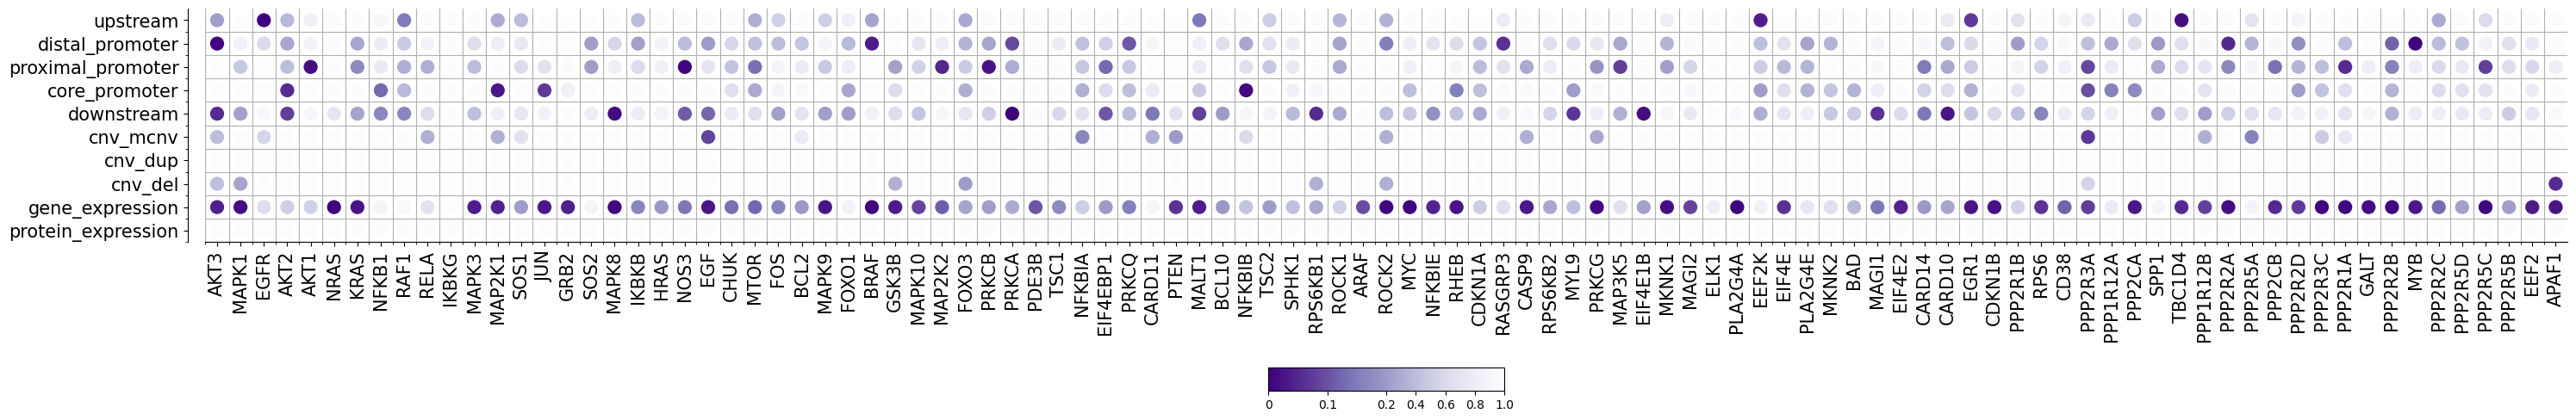

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.colors import TwoSlopeNorm, Normalize, PowerNorm
import seaborn as sns

# Define colormap
# cmap = 'Reds_r'
cmap = 'Purples_r'


# Combine all lists into a single list for sizes and colors
all_lists = pval_list_of_lists

# Retrieve unique labels (assuming gene_node_name_list exists) without reversing
xlabels = AD_sort_refilter_node_weight_pval_df['Gene_name'].tolist()  # Keep the list in original order (high to low)
print(len(xlabels))

# Define y-axis labels for 10 gene features
ylabels = pval_reversed_col_list  # Reverse the list to show the highest feature on top
# Remove ['methy-', '_pvalues'] from ylabels
ylabels = [ylabel.replace('methy_', '') for ylabel in ylabels]
ylabels = [ylabel.replace('_pvalues', '') for ylabel in ylabels]

# Define x-label indices and y-label indices (horizontal layout)
xlabels_num_list = list(np.arange(0, len(xlabels))) * len(ylabels)
ylabels_num_list = sum([[i] * len(xlabels) for i in range(len(ylabels))], [])

# Determine the number of x and y labels
xn = len(xlabels)
yn = len(ylabels)

# Retrieve size and color information for the circles
s = np.concatenate(all_lists)
c = np.concatenate(all_lists)

# Preparation of the figure with its grid (horizontal layout)
fig, ax = plt.subplots(figsize=(30, 10))
ax.set_xlim(-0.5, xn - 0.5)
ax.set_ylim(-0.5, yn - 0.5)
ax.set(xticks=np.arange(xn), yticks=np.arange(yn),
       xticklabels=xlabels, yticklabels=ylabels)

# Set minor ticks for grid
ax.set_xticks(np.arange(xn) - 0.5, minor=True)
ax.set_yticks(np.arange(yn) - 0.5, minor=True)

# Add grid
ax.grid(which='minor')

ax.set_aspect("equal", "box")

# Create circles patches and colorbar
R = [0.3] * len(s)  # Set the radius of the circles
circles = [plt.Circle((xlabels_num_list[i], ylabels_num_list[i]), radius=r) for i, r in enumerate(R)]

norm = TwoSlopeNorm(vmin=0, vmax=1, vcenter=0.2)
# norm = PowerNorm(gamma=0.5)
col = PatchCollection(circles, array=c, cmap=cmap, norm=norm)
ax.add_collection(col)

# Adjust the y-axis spine to bring the zero a little higher
ax.spines['left'].set_position(('outward', 15))  # Adjust 10 pixels outward to move it up
ax.spines['left'].set_color('black')  # Change the color

# Also adjust the x-axis spine to bring the zero a little to the left
# ax.spines['bottom'].set_position(('outward', 10))  # Adjust 10 pixels outward to move it to the left

# Rotate x-axis labels
ax.tick_params(axis='x', labelrotation=90)

# Make the font size larger for both x and y labels
ax.tick_params(axis='both', labelsize=15)

# Remove unnecessary spines
sns.despine(left=False, bottom=False, top=True, right=True)  # Set True to remove spine

# Add colorbar
# fig.colorbar(col, shrink=0.1, aspect=10, orientation='horizontal')

# Add colorbar with custom ticks
cbar = fig.colorbar(col, shrink=0.1, aspect=10, orientation='horizontal', ticks=[0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0])
cbar.ax.set_xticklabels([0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0])  # Optionally set custom tick labels

# Show the plot
# plt.show()

# Apply tight layout before saving
plt.tight_layout()

# Save the plot with high DPI and ensure the full image is saved
plt.savefig('./avg_AD_refilter_node_weight_pval_circleplot.png', dpi=600, bbox_inches='tight')

## 2. Pathway enrichment analysis

In [11]:
import pandas as pd

ad_enrichment_pathway_df = pd.read_csv('./pathway_enrichment.txt', sep='\t')
display(ad_enrichment_pathway_df)
ad_enrichment_pathway_df = ad_enrichment_pathway_df[ad_enrichment_pathway_df['FDR'] < 0.0001]
ad_enrichment_pathway_df = ad_enrichment_pathway_df[['Term', 'Genes', 'PValue', 'FDR']]

# Function to count the number of genes
def count_genes(gene_string):
    return len(gene_string.split(', '))

# Add the 'Number_of_Genes' column
ad_enrichment_pathway_df['Number_of_Genes'] = ad_enrichment_pathway_df['Genes'].apply(count_genes)
ad_enrichment_pathway_df = ad_enrichment_pathway_df.reset_index(drop=True)

# Remove the rows if the 'Term' column contains 'cancer' (case-insensitive)
ad_enrichment_pathway_df = ad_enrichment_pathway_df[~ad_enrichment_pathway_df['Term'].str.contains('cancer', case=False)]
ad_enrichment_pathway_df = ad_enrichment_pathway_df.reset_index(drop=True)

# Keep only the lowest 20 FDR pathways
ad_enrichment_pathway_df = ad_enrichment_pathway_df.sort_values('FDR').head(20)
ad_enrichment_pathway_df = ad_enrichment_pathway_df.reset_index(drop=True)
display(ad_enrichment_pathway_df)

# Removing the colon and everything after it in the "Term" column
ad_enrichment_pathway_df['Term_num'] = ad_enrichment_pathway_df['Term'].str.split(':').str[0]
display(ad_enrichment_pathway_df)


,Category,Term,Count,%,PValue,Genes,List Total,Pop Hits,Pop Total,Fold Enrichment,Bonferroni,Benjamini,FDR
0,KEGG_PATHWAY,hsa04660:T cell receptor signaling pathway,10,50.0,1.109060e-12,"NFKBIA, GSK3B, MAP2K1, MAPK8, PPP2R1B, PPP2R1A...",20,122,8840,36.229508,2.062950e-10,2.062852e-10,7.097987e-11
1,KEGG_PATHWAY,hsa05160:Hepatitis C,10,50.0,1.244011e-11,"NFKBIA, GSK3B, MAP2K1, CASP8, PPP2R1B, PPP2R1A...",20,159,8840,27.798742,2.313870e-09,1.156930e-09,3.980835e-10
2,KEGG_PATHWAY,hsa04151:PI3K-Akt signaling pathway,11,55.0,7.793335e-10,"GSK3B, MAP2K1, PPP2R1B, PPP2R1A, MYC, INSR, PI...",20,362,8840,13.430939,1.449560e-07,4.831868e-08,1.662578e-08
3,KEGG_PATHWAY,hsa04730:Long-term depression,7,35.0,1.917366e-09,"MAP2K1, PLA2G4F, PPP2R1B, PLA2G4E, PPP2R1A, PR...",20,60,8840,51.566667,3.566301e-07,8.915753e-08,3.067786e-08
4,KEGG_PATHWAY,hsa04071:Sphingolipid signaling pathway,8,40.0,3.522978e-09,"SMPD2, MAP2K1, MAPK8, PPP2R1B, PPP2R1A, PIK3R3...",20,122,8840,28.983607,6.552737e-07,1.310548e-07,4.509412e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,GOTERM_MF_DIRECT,GO:0008233~peptidase activity,2,10.0,9.221489e-02,"CASP8, MALT1",20,98,19304,19.697959,9.999925e-01,4.166747e-01,3.620288e-01
285,UP_KW_CELLULAR_COMPONENT,KW-0472~Membrane,11,55.0,9.520389e-02,"SMPD2, GSK3B, MAP2K1, PLA2G4F, MAPK8, PLA2G4E,...",16,8340,17942,1.479032,6.989707e-01,2.856117e-01,2.856117e-01
286,GOTERM_BP_DIRECT,GO:0007059~chromosome segregation,2,10.0,9.556286e-02,"PPP2R1B, PPP2R1A",20,104,19734,18.975000,1.000000e+00,7.536844e-01,7.410629e-01
287,GOTERM_BP_DIRECT,GO:0034599~cellular response to oxidative stress,2,10.0,9.556286e-02,"MAPK8, FOXO1",20,104,19734,18.975000,1.000000e+00,7.536844e-01,7.410629e-01


,Term,Genes,PValue,FDR,Number_of_Genes
0,hsa04660:T cell receptor signaling pathway,"NFKBIA, GSK3B, MAP2K1, MAPK8, PPP2R1B, PPP2R1A...",1.109060e-12,7.097987e-11,10
1,hsa05160:Hepatitis C,"NFKBIA, GSK3B, MAP2K1, CASP8, PPP2R1B, PPP2R1A...",1.244011e-11,3.980835e-10,10
2,hsa04151:PI3K-Akt signaling pathway,"GSK3B, MAP2K1, PPP2R1B, PPP2R1A, MYC, INSR, PI...",7.793335e-10,1.662578e-08,11
3,hsa04730:Long-term depression,"MAP2K1, PLA2G4F, PPP2R1B, PLA2G4E, PPP2R1A, PR...",1.917366e-09,3.067786e-08,7
4,hsa04071:Sphingolipid signaling pathway,"SMPD2, MAP2K1, MAPK8, PPP2R1B, PPP2R1A, PIK3R3...",3.522978e-09,4.509412e-08,8
5,hsa04664:Fc epsilon RI signaling pathway,"MAP2K1, PLA2G4F, MAPK8, PLA2G4E, PIK3R3, PRKCA...",4.539042e-09,4.841644e-08,7
6,hsa04014:Ras signaling pathway,"MAP2K1, PLA2G4F, MAPK8, PLA2G4E, INSR, PIK3R3,...",1.436750e-08,1.313600e-07,9
7,hsa04012:ErbB signaling pathway,"GSK3B, MAP2K1, MAPK8, MYC, PIK3R3, PRKCA, SOS2",1.742212e-08,1.393770e-07,7
8,hsa05161:Hepatitis B,"NFKBIA, MAP2K1, MAPK8, CASP8, MYC, PIK3R3, PRK...",2.665010e-08,1.895118e-07,8
9,hsa05142:Chagas disease,"NFKBIA, MAPK8, CASP8, PPP2R1B, PPP2R1A, PIK3R3...",5.185245e-08,2.552736e-07,7


,Term,Genes,PValue,FDR,Number_of_Genes,Term_num
0,hsa04660:T cell receptor signaling pathway,"NFKBIA, GSK3B, MAP2K1, MAPK8, PPP2R1B, PPP2R1A...",1.109060e-12,7.097987e-11,10,hsa04660
1,hsa05160:Hepatitis C,"NFKBIA, GSK3B, MAP2K1, CASP8, PPP2R1B, PPP2R1A...",1.244011e-11,3.980835e-10,10,hsa05160
2,hsa04151:PI3K-Akt signaling pathway,"GSK3B, MAP2K1, PPP2R1B, PPP2R1A, MYC, INSR, PI...",7.793335e-10,1.662578e-08,11,hsa04151
3,hsa04730:Long-term depression,"MAP2K1, PLA2G4F, PPP2R1B, PLA2G4E, PPP2R1A, PR...",1.917366e-09,3.067786e-08,7,hsa04730
4,hsa04071:Sphingolipid signaling pathway,"SMPD2, MAP2K1, MAPK8, PPP2R1B, PPP2R1A, PIK3R3...",3.522978e-09,4.509412e-08,8,hsa04071
5,hsa04664:Fc epsilon RI signaling pathway,"MAP2K1, PLA2G4F, MAPK8, PLA2G4E, PIK3R3, PRKCA...",4.539042e-09,4.841644e-08,7,hsa04664
6,hsa04014:Ras signaling pathway,"MAP2K1, PLA2G4F, MAPK8, PLA2G4E, INSR, PIK3R3,...",1.436750e-08,1.313600e-07,9,hsa04014
7,hsa04012:ErbB signaling pathway,"GSK3B, MAP2K1, MAPK8, MYC, PIK3R3, PRKCA, SOS2",1.742212e-08,1.393770e-07,7,hsa04012
8,hsa05161:Hepatitis B,"NFKBIA, MAP2K1, MAPK8, CASP8, MYC, PIK3R3, PRK...",2.665010e-08,1.895118e-07,8,hsa05161
9,hsa05142:Chagas disease,"NFKBIA, MAPK8, CASP8, PPP2R1B, PPP2R1A, PIK3R3...",5.185245e-08,2.552736e-07,7,hsa05142


C:\Users\hemingzhang\AppData\Local\Temp\ipykernel_16224\1285812864.py:18: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



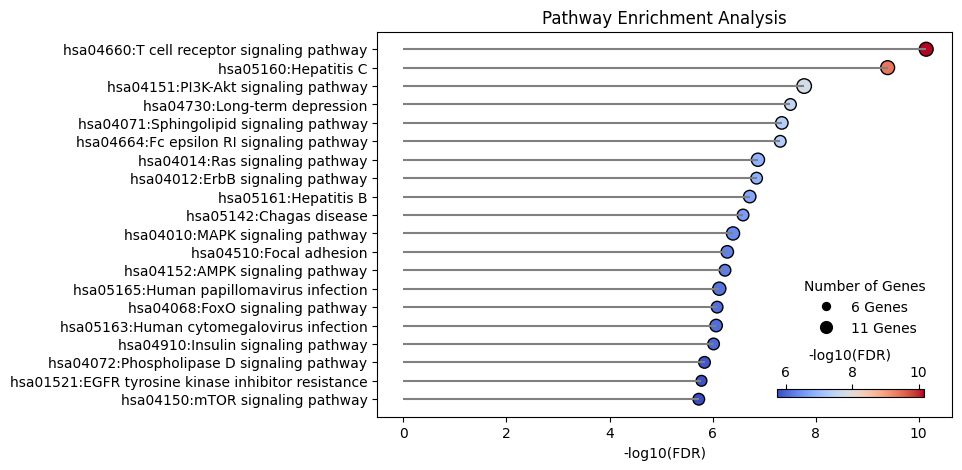

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.lines import Line2D

# plot the lolipop plot but ranked from the highest to the lowest

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(10, 5))

# Generate a sequence of numbers corresponding to the rows in your DataFrame
y = np.arange(len(ad_enrichment_pathway_df))

# Normalize the FDR values for colormap
norm = mcolors.Normalize(vmin=min(-np.log10(ad_enrichment_pathway_df['FDR'])), 
                         vmax=max(-np.log10(ad_enrichment_pathway_df['FDR'])))
cmap = cm.get_cmap('coolwarm')  # Blue to red colormap

# Assume the size of points represents the number of genes (adjust according to your data)
sizes = ad_enrichment_pathway_df['Number_of_Genes'] * 10  # Adjust

# Create horizontal lines from x=0 to the -log10(FDR) values
ax.hlines(y, 0, -np.log10(ad_enrichment_pathway_df['FDR']), color='grey')

# Plot points with colors from the colormap and sizes reflecting the number of genes
sc = ax.scatter(-np.log10(ad_enrichment_pathway_df['FDR']), y, 
                c=-np.log10(ad_enrichment_pathway_df['FDR']), cmap=cmap, s=sizes, edgecolor='black')

# Set y-axis ticks and labels to correspond to pathway names
ax.set_yticks(y)
ax.set_yticklabels(ad_enrichment_pathway_df['Term'])

# Set the x-axis label
ax.set_xlabel('-log10(FDR)')
ax.invert_yaxis()

# Set the plot title
ax.set_title('Pathway Enrichment Analysis')

# Create legend for the number of genes with only two markers (min and max)
min_size = min(ad_enrichment_pathway_df['Number_of_Genes'])
max_size = max(ad_enrichment_pathway_df['Number_of_Genes'])
size_legend = [
    Line2D([0], [0], marker='o', color='w', label=f'{int(min_size)} Genes',
           markerfacecolor='black', markersize=np.sqrt(min_size * 10)),
    Line2D([0], [0], marker='o', color='w', label=f'{int(max_size)} Genes',
           markerfacecolor='black', markersize=np.sqrt(max_size * 10))
]

# Add the number of genes legend, positioned below the colorbar legend
ax.legend(handles=size_legend, title='Number of Genes', loc='lower right', bbox_to_anchor=(0.975, 0.18), frameon=False)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create an inset for the colorbar inside the main plot
cax = inset_axes(ax, width='30%', height='3%', loc='lower right',
                 bbox_to_anchor=(0.1, 0.05, 0.85, 0.725), bbox_transform=ax.transAxes, borderpad=0)

# Add a colorbar to represent the FDR values in the inset
cbar = plt.colorbar(sc, cax=cax, orientation='horizontal')
cbar.set_label('-log10(FDR)')
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_ticks_position('top')

# Adjust layout to make room for the legends
plt.subplots_adjust(right=0.7)  # Adjust this to give more space

# Display the plot
plt.show()



In [17]:


from bioservices import KEGG

# Initialize the KEGG service
kegg = KEGG()

# Example pathway ID (you can replace 'hsa04010' with any other pathway ID)
pathway_id_list = ad_enrichment_pathway_df['Term_num'].tolist()
pathway_class_list = []

for pathway_id in pathway_id_list:
    # Retrieve the pathway information
    pathway_info = kegg.get(pathway_id)

    # Extract the pathway class
    lines = pathway_info.split("\n")
    for line in lines:
        if line.startswith("CLASS"):
            pathway_class = line.replace("CLASS       ", "").strip()
            pathway_class_list.append(pathway_class)
            # print(f"Pathway ID: {pathway_id}")
            # print(f"Pathway Class: {pathway_class}")

# Add the 'Pathway_Class' column
ad_enrichment_pathway_df['Pathway_Class'] = pathway_class_list
display(ad_enrichment_pathway_df)

,Term,Genes,PValue,FDR,Number_of_Genes,Term_num,Pathway_Class
0,hsa04660:T cell receptor signaling pathway,"NFKBIA, GSK3B, MAP2K1, MAPK8, PPP2R1B, PPP2R1A...",1.109060e-12,7.097987e-11,10,hsa04660,Organismal Systems; Immune system
1,hsa05160:Hepatitis C,"NFKBIA, GSK3B, MAP2K1, CASP8, PPP2R1B, PPP2R1A...",1.244011e-11,3.980835e-10,10,hsa05160,Human Diseases; Infectious disease: viral
2,hsa04151:PI3K-Akt signaling pathway,"GSK3B, MAP2K1, PPP2R1B, PPP2R1A, MYC, INSR, PI...",7.793335e-10,1.662578e-08,11,hsa04151,Environmental Information Processing; Signal t...
3,hsa04730:Long-term depression,"MAP2K1, PLA2G4F, PPP2R1B, PLA2G4E, PPP2R1A, PR...",1.917366e-09,3.067786e-08,7,hsa04730,Organismal Systems; Nervous system
4,hsa04071:Sphingolipid signaling pathway,"SMPD2, MAP2K1, MAPK8, PPP2R1B, PPP2R1A, PIK3R3...",3.522978e-09,4.509412e-08,8,hsa04071,Environmental Information Processing; Signal t...
5,hsa04664:Fc epsilon RI signaling pathway,"MAP2K1, PLA2G4F, MAPK8, PLA2G4E, PIK3R3, PRKCA...",4.539042e-09,4.841644e-08,7,hsa04664,Organismal Systems; Immune system
6,hsa04014:Ras signaling pathway,"MAP2K1, PLA2G4F, MAPK8, PLA2G4E, INSR, PIK3R3,...",1.436750e-08,1.313600e-07,9,hsa04014,Environmental Information Processing; Signal t...
7,hsa04012:ErbB signaling pathway,"GSK3B, MAP2K1, MAPK8, MYC, PIK3R3, PRKCA, SOS2",1.742212e-08,1.393770e-07,7,hsa04012,Environmental Information Processing; Signal t...
8,hsa05161:Hepatitis B,"NFKBIA, MAP2K1, MAPK8, CASP8, MYC, PIK3R3, PRK...",2.665010e-08,1.895118e-07,8,hsa05161,Human Diseases; Infectious disease: viral
9,hsa05142:Chagas disease,"NFKBIA, MAPK8, CASP8, PPP2R1B, PPP2R1A, PIK3R3...",5.185245e-08,2.552736e-07,7,hsa05142,Human Diseases; Infectious disease: parasitic


In [18]:
# Remove the element content after the first semicolon in the 'Pathway_Class' column
ad_enrichment_pathway_df['Pathway_Class_detail'] = ad_enrichment_pathway_df['Pathway_Class'].str.split(';').str[1]
display(ad_enrichment_pathway_df)

,Term,Genes,PValue,FDR,Number_of_Genes,Term_num,Pathway_Class,Pathway_Class_detail
0,hsa04660:T cell receptor signaling pathway,"NFKBIA, GSK3B, MAP2K1, MAPK8, PPP2R1B, PPP2R1A...",1.109060e-12,7.097987e-11,10,hsa04660,Organismal Systems; Immune system,Immune system
1,hsa05160:Hepatitis C,"NFKBIA, GSK3B, MAP2K1, CASP8, PPP2R1B, PPP2R1A...",1.244011e-11,3.980835e-10,10,hsa05160,Human Diseases; Infectious disease: viral,Infectious disease: viral
2,hsa04151:PI3K-Akt signaling pathway,"GSK3B, MAP2K1, PPP2R1B, PPP2R1A, MYC, INSR, PI...",7.793335e-10,1.662578e-08,11,hsa04151,Environmental Information Processing; Signal t...,Signal transduction
3,hsa04730:Long-term depression,"MAP2K1, PLA2G4F, PPP2R1B, PLA2G4E, PPP2R1A, PR...",1.917366e-09,3.067786e-08,7,hsa04730,Organismal Systems; Nervous system,Nervous system
4,hsa04071:Sphingolipid signaling pathway,"SMPD2, MAP2K1, MAPK8, PPP2R1B, PPP2R1A, PIK3R3...",3.522978e-09,4.509412e-08,8,hsa04071,Environmental Information Processing; Signal t...,Signal transduction
5,hsa04664:Fc epsilon RI signaling pathway,"MAP2K1, PLA2G4F, MAPK8, PLA2G4E, PIK3R3, PRKCA...",4.539042e-09,4.841644e-08,7,hsa04664,Organismal Systems; Immune system,Immune system
6,hsa04014:Ras signaling pathway,"MAP2K1, PLA2G4F, MAPK8, PLA2G4E, INSR, PIK3R3,...",1.436750e-08,1.313600e-07,9,hsa04014,Environmental Information Processing; Signal t...,Signal transduction
7,hsa04012:ErbB signaling pathway,"GSK3B, MAP2K1, MAPK8, MYC, PIK3R3, PRKCA, SOS2",1.742212e-08,1.393770e-07,7,hsa04012,Environmental Information Processing; Signal t...,Signal transduction
8,hsa05161:Hepatitis B,"NFKBIA, MAP2K1, MAPK8, CASP8, MYC, PIK3R3, PRK...",2.665010e-08,1.895118e-07,8,hsa05161,Human Diseases; Infectious disease: viral,Infectious disease: viral
9,hsa05142:Chagas disease,"NFKBIA, MAPK8, CASP8, PPP2R1B, PPP2R1A, PIK3R3...",5.185245e-08,2.552736e-07,7,hsa05142,Human Diseases; Infectious disease: parasitic,Infectious disease: parasitic


In [19]:
import pandas as pd
import plotly.graph_objects as go


# Prepare data for the Sankey plot
labels = list(ad_enrichment_pathway_df['Pathway_Class_detail'].unique()) + list(ad_enrichment_pathway_df['Term']) + [gene for genes in ad_enrichment_pathway_df['Genes'] for gene in genes.split(', ')]

source = []
target = []
value = []

# Map overall signaling pathways to terms
for i, row in ad_enrichment_pathway_df.iterrows():
    source.append(labels.index(row['Pathway_Class_detail']))
    target.append(labels.index(row['Term']))
    value.append(1)

# Map terms to genes
for i, row in ad_enrichment_pathway_df.iterrows():
    for gene in row['Genes'].split(', '):
        source.append(labels.index(row['Term']))
        target.append(labels.index(gene))
        value.append(1)

# Create the Sankey plot
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=labels,
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
))

# Update layout
fig.update_layout(title_text='Sankey Diagram: Overall Signaling Pathways to Terms to Genes', font_size=10)

# Display the plot
fig.write_html('./sankey_diagram.html')
